# Model Parameters Tuning

<hr>

## Manual Parameter Tuning using *cross_val_score*
- Using the **iris** dataset
- Using **KNN** Model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Read in the iris Data
iris = load_iris()

# Create X (Features) and y (Reponse)
X = iris.data
y = iris.target

In [3]:
# 10-fold CV with KNN = 5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [4]:
# Use Average Accuracy as an estimate of out-of-sample accuracy
scores.mean()

0.96666666666666679

In [5]:
# Search for an optimal value of KNN
k_scores = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
k_scores

[0.95999999999999996,
 0.95333333333333337,
 0.96666666666666656,
 0.96666666666666656,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.97333333333333338,
 0.96666666666666679,
 0.96666666666666679,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.98000000000000009,
 0.96666666666666656,
 0.96666666666666656,
 0.97333333333333338,
 0.95999999999999996,
 0.96666666666666656,
 0.95999999999999996,
 0.96666666666666656,
 0.95333333333333337,
 0.95333333333333337,
 0.95333333333333337]

In [6]:
# Select the best K, based on highest Accuracy
np.array(k_scores).argmax(axis=0) + 1

13

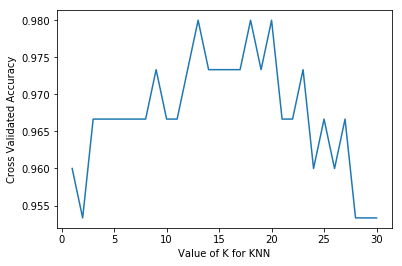

In [7]:
# Plot the results
# Plot the value of k for KNN on x-axis vs. the cross-validated accuracy on the y-axis
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

<hr>

## Automated Parameter Tuning using *GridSearchCV*

In [8]:
from sklearn.model_selection import GridSearchCV

### 1. Define a **grid of parameters** that will be searched using K-fold Cross-Validation

In [9]:
# Define a parameter that should be searched
k_range = range(1, 31)

# Create a dictionary of parameter grid that maps the names to the values that should be searched
param_grid = dict(n_neighbors = list(k_range))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


### 2. Instantiate the Grid
- Creates an *object* ready for **10-fold Cross-Validation**, using **KNN** Model, using **Classification Accuracy** as an evaluation metric, repeated with different K given in the *param_grid*
- For Parallel Programming use *n_jobs = -1* to use all CPUs
- *n_jobs = -2* all CPUs but one are used

In [10]:
grid = GridSearchCV(knn, param_grid,cv=10, scoring='accuracy')

### 3. Train by Fitting the Grid with Data 
- Running 10-fold CV, 30 times (for each K)

In [11]:
# Pass the X and y to the grid.fit
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 4. Examine the Trained Model
- The **grid\_scores\_**  attribute was deprecated in version 0.18
- Use **cv\_result\s_** attribute, which returns a dictionary

In [24]:
# Look at the results in grid.cv_results_
results = {'params': grid.cv_results_['params'],
           'mean': grid.cv_results_['mean_test_score'],
           'std': grid.cv_results_['std_test_score']}

results = pd.DataFrame(results)
results.index += 1 
results

,mean,params,std
1,0.960000,{'n_neighbors': 1},0.053333
2,0.953333,{'n_neighbors': 2},0.052068
3,0.966667,{'n_neighbors': 3},0.044721
4,0.966667,{'n_neighbors': 4},0.044721
5,0.966667,{'n_neighbors': 5},0.044721
6,0.966667,{'n_neighbors': 6},0.044721
7,0.966667,{'n_neighbors': 7},0.044721
8,0.966667,{'n_neighbors': 8},0.044721
9,0.973333,{'n_neighbors': 9},0.032660
10,0.966667,{'n_neighbors': 10},0.044721


- High std indicates that the Mean of Cross-Validation Accuracy might not be as reliable

In [25]:
# Create a list of the Mean scores
grid_mean_scores = grid.cv_results_['mean_test_score']
grid_mean_scores

array([ 0.96      ,  0.95333333,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.97333333,  0.96666667,
        0.96666667,  0.97333333,  0.98      ,  0.97333333,  0.97333333,
        0.97333333,  0.97333333,  0.98      ,  0.97333333,  0.98      ,
        0.96666667,  0.96666667,  0.97333333,  0.96      ,  0.96666667,
        0.96      ,  0.96666667,  0.95333333,  0.95333333,  0.95333333])

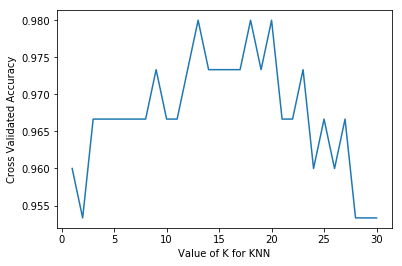

In [26]:
# Plot the Results: 
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [29]:
#Get the best Model directly
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


<hr>

## Multiple Parameter Tuning using *GridSearchCV*
- Example with using **DecisionTreeClassifier**, can tune parameters for *max_depth* and *min_sample_leaf*
- For **KNN** besides tunning for *K*, can also tune for *weigths* parameter 
    - default is **uniform**, treats all neighbors equally
    - **distance**, weights closer neighbors more heavily than distant neighbors

### 1. Define a grid of parameters that will be searched using K-fold Cross-Validation

In [27]:
# Define parameters that should be searched
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

# Create a dictionary of parameter grid that maps the names to the values (array) that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


### 2. Instantiate the Grid
- Creates an *object* ready for **10-fold Cross-Validation**, using **KNN** Model, using **Classification Accuracy** as an evaluation metric, repeated with different *K* and *weight* given in the *param_grid*

In [28]:
grid = GridSearchCV(knn, param_grid,cv=10, scoring='accuracy')

### 3. Train by Fitting the Grid with Data 
- Running 10-fold CV, 60 times (for each *K* and *weight*)

In [29]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 4. Examine the Trained Model

In [30]:
# Look at the results in grid.cv_results_
results = {'params': grid.cv_results_['params'],
           'mean': grid.cv_results_['mean_test_score'],
           'std': grid.cv_results_['std_test_score']}

results = pd.DataFrame(results)
results.index += 1 
results

,mean,params,std
1,0.960000,"{'n_neighbors': 1, 'weights': 'uniform'}",0.053333
2,0.960000,"{'n_neighbors': 1, 'weights': 'distance'}",0.053333
3,0.953333,"{'n_neighbors': 2, 'weights': 'uniform'}",0.052068
4,0.960000,"{'n_neighbors': 2, 'weights': 'distance'}",0.053333
5,0.966667,"{'n_neighbors': 3, 'weights': 'uniform'}",0.044721
6,0.966667,"{'n_neighbors': 3, 'weights': 'distance'}",0.044721
7,0.966667,"{'n_neighbors': 4, 'weights': 'uniform'}",0.044721
8,0.966667,"{'n_neighbors': 4, 'weights': 'distance'}",0.044721
9,0.966667,"{'n_neighbors': 5, 'weights': 'uniform'}",0.044721
10,0.966667,"{'n_neighbors': 5, 'weights': 'distance'}",0.044721


In [32]:
# Examine the best Model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


<hr>

## Using the Best Parameters to Predict
- Train the Model using the best parameters using all the data
- **GridSearchCV** performs Cross-Validation while tunning
- Can also Predict with **GridSearchCV**, which will use the best parameters and Train on the whole dataset

In [33]:
# Train the Model with the best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [34]:
# Predict on out-of-sample data
knn.predict([[3,5,4,2]])

array([1])

In [36]:
# Same as the above in one step
# Refit the best Model using all of the data and Predict
grid.predict([[3,5,4,2]])

array([1])

<hr>

## Reduce Computational Expense Using *RandomizedSearchCV*
- Searches a subset of the parameters

In [37]:
from sklearn.model_selection import RandomizedSearchCV

### 1. Specify Parameter distributions rather than parameter grid
- For discrete parameters, parameter distribution is the same as parameter grid

In [38]:
# Define parameters that should be searched
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

# Create a dictionary of parameter distributions that maps the names to the values (array) that should be searched
param_dist = dict(n_neighbors=k_range, weights=weight_options)
print(param_dist)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
